In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 데이터 준비


In [24]:
df = pd.read_csv("../data/RocketLaunchDataCompleted.csv", encoding="cp949")
df.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,04-Dec-58,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26,Cloudy,NaN
1,NaN,05-Dec-58,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26,Cloudy,NaN
2,Pioneer 3,06-Dec-58,1:45,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25,Cloudy,NaN
3,NaN,07-Dec-58,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25,Partly Cloudy,NaN
4,NaN,08-Dec-58,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24,Partly Cloudy,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          60 non-null     object 
 1   Date                          300 non-null    object 
 2   Time (East Coast)             59 non-null     object 
 3   Location                      300 non-null    object 
 4   Crewed or Uncrewed            60 non-null     object 
 5   Launched?                     60 non-null     object 
 6   High Temp                     299 non-null    float64
 7   Low Temp                      299 non-null    float64
 8   Ave Temp                      299 non-null    float64
 9   Temp at Launch Time           59 non-null     float64
 10  Hist High Temp                299 non-null    float64
 11  Hist Low Temp                 299 non-null    float64
 12  Hist Ave Temp                 299 non-null    float64
 13  Perci

### 결측치 처리


#### 결측치 확인


In [26]:
print(df.isnull().sum().sort_values(ascending=False))

Hist Ave Sea Level Pressure     300
Hist Ave Visibility             300
Hist Ave Max Wind Speed         300
Notes                           297
Temp at Launch Time             241
Time (East Coast)               241
Wind Speed at Launch Time       241
Name                            240
Crewed or Uncrewed              240
Launched?                       240
Condition                         2
Day Length                        2
Ave Temp                          1
Low Temp                          1
Sea Level Pressure                1
High Temp                         1
Visibility                        1
Max Wind Speed                    1
Wind Direction                    1
Hist Ave Percipitation            1
Hist Ave Temp                     1
Hist Low Temp                     1
Hist High Temp                    1
Percipitation at Launch Time      1
Date                              0
Location                          0
dtype: int64


<Axes: >

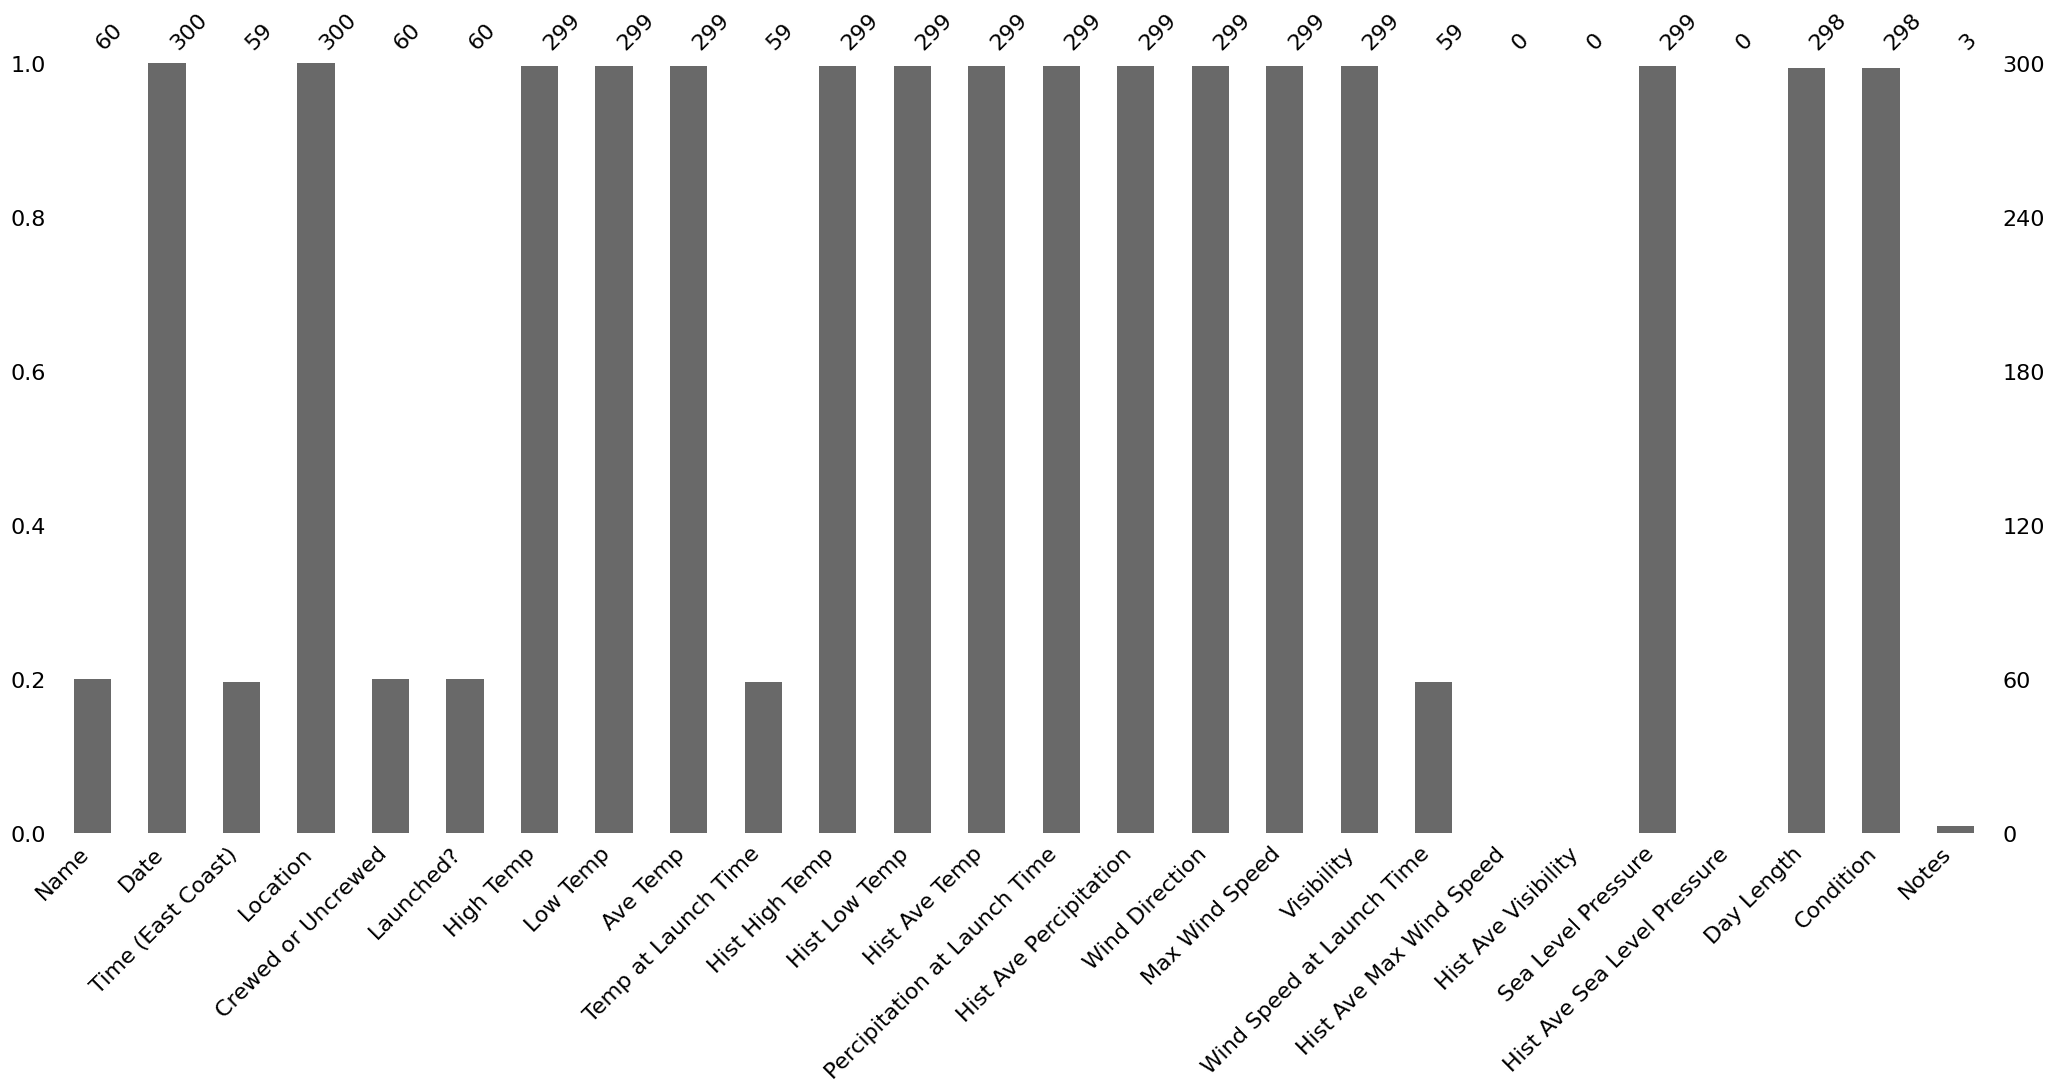

In [27]:
# pip install missingno
import missingno

plt.figure(figsize=(10, 4))
missingno.bar(df)

#### 사용하지 않을 컬럼 삭제


In [28]:
# ----------------------------------------------------------------------
# 전체 누락
#    -  Hist Ave Sea Level Pressure, Hist Ave Visibility, Hist Ave Max Wind Speed
# 관련도 낮음
#    - Name, Date, Time (East Coast), Location
#    - Day Length, Notes, Sea Level Pressure
# ----------------------------------------------------------------------
drop_cols = [
    "Hist Ave Sea Level Pressure",
    "Hist Ave Visibility",
    "Hist Ave Max Wind Speed",
    "Name",
    "Date",
    "Time (East Coast)",
    "Location",
    "Day Length",
    "Notes",
    "Sea Level Pressure",
]

df = df.drop(drop_cols, axis=1)

df

,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
0,NaN,NaN,75.0,68.0,71.00,NaN,75.0,55.0,65.0,0.00,0.08,E,16.0,15.0,NaN,Cloudy
1,NaN,NaN,78.0,70.0,73.39,NaN,75.0,55.0,65.0,0.00,0.09,E,14.0,10.0,NaN,Cloudy
2,Uncrewed,Y,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.00,0.09,NE,15.0,10.0,11.0,Cloudy
3,NaN,NaN,76.0,57.0,66.04,NaN,75.0,55.0,65.0,0.00,0.08,N,10.0,10.0,NaN,Partly Cloudy
4,NaN,NaN,79.0,60.0,70.52,NaN,75.0,55.0,65.0,0.00,0.09,E,12.0,10.0,NaN,Partly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,NaN,87.0,71.0,79.36,NaN,87.0,70.0,79.0,0.00,0.15,S,20.0,10.0,NaN,Thunder
296,NaN,NaN,86.0,72.0,79.50,NaN,88.0,70.0,79.0,0.01,0.16,SE,18.0,10.0,NaN,Fair
297,Crewed,Y,87.0,75.0,79.69,80.0,88.0,70.0,79.0,0.00,0.16,SE,16.0,10.0,7.0,Fair
298,NaN,NaN,87.0,72.0,79.70,NaN,88.0,70.0,79.0,0.46,0.16,E,13.0,10.0,NaN,Cloudy


#### 결측치 채우기


In [29]:
# ----------------------------------------------------------------------
#   Crewed or Uncrewed  -> Uncrewed
#   Launched?           -> N
#   Wind Direction      -> Unknown
#   Condition           -> Fail
# ----------------------------------------------------------------------
fill_cols = {
    "Crewed or Uncrewed": "Uncrewed",
    "Launched?": "N",
    "Wind Direction": "Unknown",
    "Condition": "Fail",
}
df = df.fillna(fill_cols)

In [30]:
# ----------------------------------------------------------------------
#   그 외 누락값         -> 0
# ----------------------------------------------------------------------
df = df.fillna(0)

### 독립변수, 종속변수 지정


In [31]:
df.isnull().sum()

Crewed or Uncrewed              0
Launched?                       0
High Temp                       0
Low Temp                        0
Ave Temp                        0
Temp at Launch Time             0
Hist High Temp                  0
Hist Low Temp                   0
Hist Ave Temp                   0
Percipitation at Launch Time    0
Hist Ave Percipitation          0
Wind Direction                  0
Max Wind Speed                  0
Visibility                      0
Wind Speed at Launch Time       0
Condition                       0
dtype: int64

In [32]:
X = df.drop("Launched?", axis=1)
y = df["Launched?"]

In [33]:
# ---------------------------
# 종속변수 인코딩
# ---------------------------
df["Launched?"] = df["Launched?"].map({"Y": 1, "N": 0})

### 훈련세트/테스트세트 분할


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((225, 15), (75, 15), (225,), (75,))

### 전처리 파이프라인


In [35]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# -----------------------------
# 전처리 대상 컬럼 지정
#   - categorical_features : 원‑핫 인코딩할 범주형 변수 목록
#   - numerical_features   : 표준화(평균 0, 표준편차 1)할 수치형 변수 목록
# -----------------------------
categorical_features = X_train.select_dtypes(include="object").columns
numerical_features = X_train.select_dtypes(include="number").columns


# -----------------------------
# ColumnTransformer 구성
#   - "cat" : 범주형 → OneHotEncoder
#   - "num" : 수치형 → StandardScaler
#   remainder="passthrough" : transformers에 포함되지 않은 컬럼은 변환 없이 그대로 유지
# -----------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numerical_features),
    ],
    remainder="passthrough",  # drop 으로 바꾸면 나머지 컬럼을 제거
)

### 훈련 및 평가


In [36]:
# --------------------------------------------
# 파이프라인 정의
# --------------------------------------------
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("rf", RandomForestClassifier())
    ]
)

In [37]:
# --------------------------------------------
# 훈련
# --------------------------------------------
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Crewed or Uncrewed', 'Wind Direction', 'Condition'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Max Wind Speed', 'Visibility', 'Wind Speed at Launch Time'],
      dtype='object'))])),
                ('rf', RandomForestClassifier())])

In [38]:
# --------------------------------------------
# 평가
# --------------------------------------------
pipeline.score(X_test, y_test)

0.9866666666666667

### pipeline에서 모델의 학습결과 확인

- 파이프라인에서 각 스텝의 결과 가져오기
  - `pipeline.named_steps['단계명']`


In [39]:
# ------------------------------
# 모델 객체 가져오기
# ------------------------------
model = pipeline.named_steps["rf"]
model

RandomForestClassifier()

In [40]:
# ------------------------------
# 모델이 학습한 결과 확인 - 특성의 중요도
# ------------------------------
importance = model.feature_importances_
importance

array([4.21071934e-02, 5.51700633e-02, 2.45879236e-03, 1.72973358e-03,
       8.96628336e-04, 9.58040692e-04, 2.54975062e-03, 2.45394211e-03,
       5.40865971e-04, 3.64001873e-03, 1.55896670e-03, 2.68725950e-03,
       2.19118882e-03, 3.19471964e-03, 2.62125863e-03, 0.00000000e+00,
       3.64287867e-06, 4.21870484e-03, 6.77845961e-03, 6.99070331e-04,
       1.97821341e-04, 3.52303606e-04, 2.22394506e-02, 1.48450468e-02,
       2.15290566e-02, 3.48009613e-01, 8.51337972e-03, 1.27781060e-02,
       8.20275344e-03, 1.17204474e-02, 1.20538042e-02, 1.02342439e-02,
       1.12186730e-02, 3.81647001e-01])

In [41]:
# ------------------------------
# 모델이 학습한 결과 확인 - feature_names
# ------------------------------
feature_names = pipeline.named_steps["preprocessor"].get_feature_names_out()

<Axes: ylabel='feature_names'>

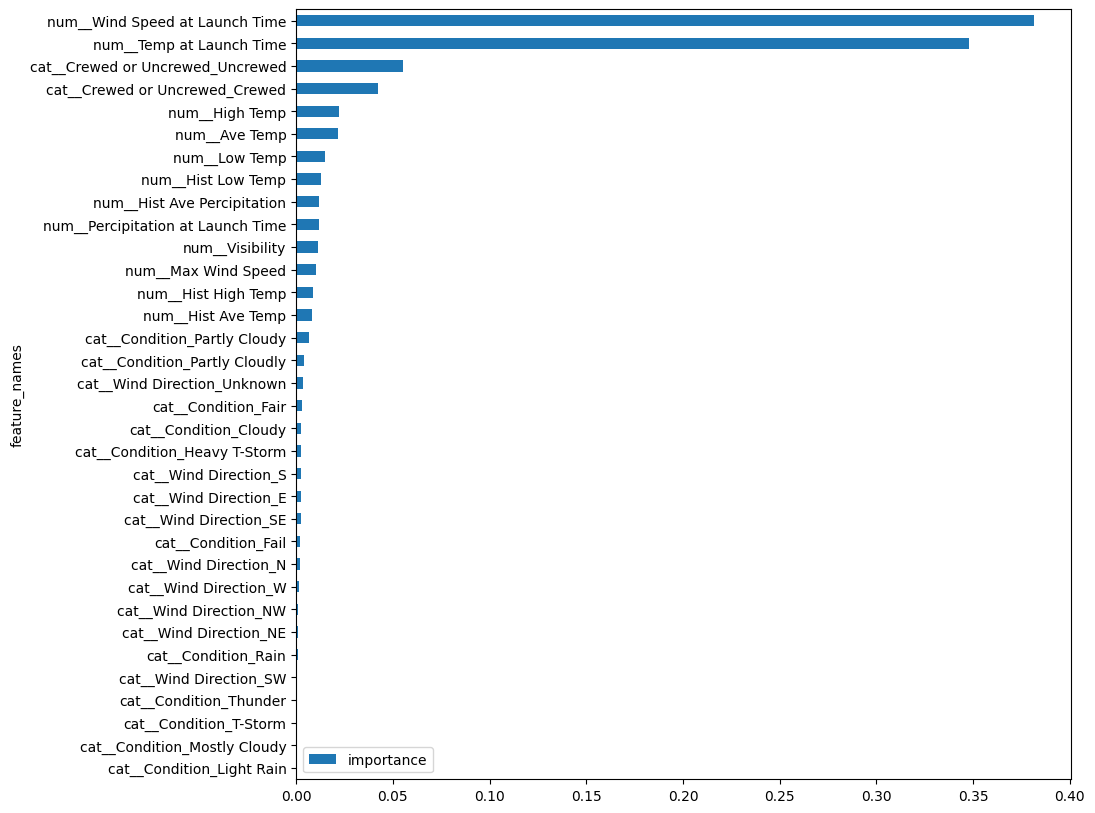

In [43]:
# ------------------------------
# 모델이 학습한 결과 확인 - 특성의 중요도 시각화
# ------------------------------
df_result = pd.DataFrame()
df_result["feature_names"] = feature_names
df_result["importance"] = importance
df_result.sort_values("importance").plot(kind="barh", x="feature_names", figsize=(10, 10))